In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_first_row_for_stocks(tickers):
    all_first_rows = []

    for ticker in tickers:
        try:
            # Get ticker data
            stock = yf.Ticker(ticker)
            
            # Get recommendations summary (replace this with revenue or other data as needed)
            data = stock.recommendations_summary
            
            # Check if data is valid
            if data is None or data.empty:
                print(f"No data available for ticker: {ticker}")
                continue
            
            # Get the first row and add ticker as a column
            first_row = data.iloc[[0]].copy()
            first_row['Ticker'] = ticker
            first_row.index = [f"Data for {ticker} on {first_row.index[0]}"]
            
            all_first_rows.append(first_row)
        
        except Exception as e:
            print(f"An error occurred for ticker {ticker}: {e}")

    # Combine all rows into a single DataFrame
    combined_df = pd.concat(all_first_rows) if all_first_rows else pd.DataFrame()
    return combined_df

# Example usage with 4 stocks
tickers = ["ASC", "AXR", "CHCI", "EGY", "GAMB", "IDR", "MDXG", "OPXS", "RDVT"]
df = get_first_row_for_stocks(tickers)

# Display the result
if not df.empty:
    print(df)


                   period  strongBuy  buy  hold  sell  strongSell Ticker
Data for ASC on 0      0m          4    7     1     0           0    ASC
Data for AXR on 0      0m          0    0     0     0           0    AXR
Data for CHCI on 0     0m          0    0     0     0           0   CHCI
Data for EGY on 0      0m          0    0     1     0           0    EGY
Data for GAMB on 0     0m          0    0     0     0           0   GAMB
Data for IDR on 0      0m          0    0     0     0           0    IDR
Data for MDXG on 0     0m          1    3     0     0           0   MDXG
Data for OPXS on 0     0m          0    0     0     0           0   OPXS
Data for RDVT on 0     0m          0    0     0     0           0   RDVT


In [2]:
df

,period,strongBuy,buy,hold,sell,strongSell,Ticker
Data for ASC on 0,0m,4,7,1,0,0,ASC
Data for AXR on 0,0m,0,0,0,0,0,AXR
Data for CHCI on 0,0m,0,0,0,0,0,CHCI
Data for EGY on 0,0m,0,0,1,0,0,EGY
Data for GAMB on 0,0m,0,0,0,0,0,GAMB
Data for IDR on 0,0m,0,0,0,0,0,IDR
Data for MDXG on 0,0m,1,3,0,0,0,MDXG
Data for OPXS on 0,0m,0,0,0,0,0,OPXS
Data for RDVT on 0,0m,0,0,0,0,0,RDVT


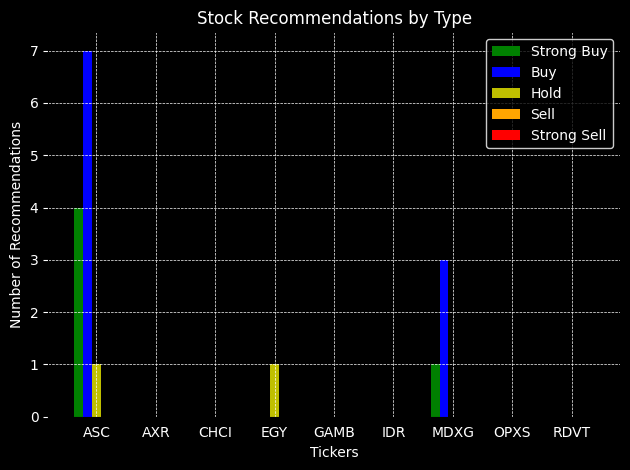

In [3]:
# Plotting setup
x = np.arange(len(df['Ticker']))  # the label locations
width = 0.15  # width of the bars

fig, ax = plt.subplots()
fig.patch.set_facecolor('black')  # Set background color of the figure

# Creating bars with updated background and color configurations
rects1 = ax.bar(x - 2*width, df['strongBuy'], width, label='Strong Buy', color='g')
rects2 = ax.bar(x - width, df['buy'], width, label='Buy', color='b')
rects3 = ax.bar(x, df['hold'], width, label='Hold', color='y')
rects4 = ax.bar(x + width, df['sell'], width, label='Sell', color='orange')
rects5 = ax.bar(x + 2*width, df['strongSell'], width, label='Strong Sell', color='r')

# Set axes background color to black
ax.set_facecolor('black')

# Setting labels, title, and ticks with a white color for visibility
ax.set_xlabel('Tickers', color='white')
ax.set_ylabel('Number of Recommendations', color='white')
ax.set_title('Stock Recommendations by Type', color='white')
ax.set_xticks(x)
ax.set_xticklabels(df['Ticker'], color='white')
ax.tick_params(axis='y', colors='white')

# Adding a grid with white color
ax.grid(True, color='white', linestyle='--', linewidth=0.5)

# Adding the legend with a white font
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Display the plot
plt.tight_layout()
plt.show()
